In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix

In [2]:
df=pd.read_csv("grade_data.csv")
df

,Study_Hours,Attendance,Assignments_Completed,Grade
0,4.370861,84.908086,12,0
1,9.556429,76.804818,7,1
2,7.587945,65.476381,12,0
3,6.387926,90.689751,9,0
4,2.404168,84.236559,5,1
...,...,...,...,...
495,4.180170,54.579104,9,0
496,6.252905,95.865679,8,1
497,1.699612,56.840932,14,2
498,9.769553,97.511868,5,1


In [3]:
x=df.drop("Grade",axis=1)
y=df["Grade"]
y

0      0
1      1
2      0
3      0
4      1
      ..
495    0
496    1
497    2
498    1
499    1
Name: Grade, Length: 500, dtype: int64

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
model=LogisticRegression(multi_class="multinomial")
model.fit(x_train,y_train)


c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [6]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-

{'fit_time': array([0.02896285, 0.01386023, 0.02788615, 0.02068138, 0.0163672 ]),
 'score_time': array([0.00289249, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.58, 0.64, 0.61, 0.62, 0.6 ]),
 'train_score': array([0.6275, 0.605 , 0.615 , 0.6125, 0.5975])}

In [7]:
y_prob=model.predict_proba(x_test)
y_prob

array([[0.20902564, 0.7345071 , 0.05646727],
       [0.1163233 , 0.86411598, 0.01956072],
       [0.38167833, 0.13197133, 0.48635035],
       [0.3497322 , 0.29560167, 0.35466613],
       [0.18906267, 0.78897066, 0.02196668],
       [0.28522457, 0.54411474, 0.17066069],
       [0.28993784, 0.24276454, 0.46729763],
       [0.3256544 , 0.41116386, 0.26318174],
       [0.38252242, 0.306292  , 0.31118558],
       [0.14859692, 0.82733122, 0.02407186],
       [0.14888641, 0.82161587, 0.02949772],
       [0.41350192, 0.34343772, 0.24306037],
       [0.24894995, 0.63005135, 0.1209987 ],
       [0.36894929, 0.45318674, 0.17786396],
       [0.35534626, 0.14362468, 0.50102907],
       [0.28131074, 0.67162954, 0.04705972],
       [0.38863251, 0.36527903, 0.24608846],
       [0.2223669 , 0.73620973, 0.04142337],
       [0.26458534, 0.59409292, 0.14132173],
       [0.16258444, 0.81855047, 0.01886509],
       [0.24765316, 0.662623  , 0.08972384],
       [0.21742171, 0.73685809, 0.04572019],
       [0.

In [8]:
loss=log_loss(y_test,y_prob)
loss

0.9087039543509866

In [9]:
y_pred=model.predict(x_test)
y_pred


array([1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2])

In [10]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:55.00%


In [11]:
cm=confusion_matrix(y_test,y_pred)

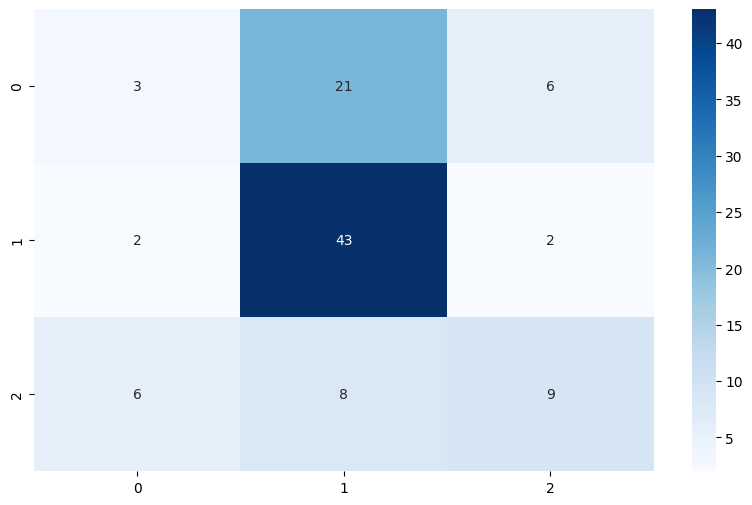

In [12]:
plt.figure(figsize=[10,6])
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.show()

In [13]:
data=([[4.370861,84.908086,12]])
pre=model.predict(data)
pre

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])